In [20]:
import os
from dotenv import load_dotenv
load_dotenv()

True

In [21]:
from langgraph.graph import StateGraph,START,END
from typing import TypedDict
from langchain_openai import ChatOpenAI

In [22]:
llm = ChatOpenAI()
llm.invoke("Hi")

AIMessage(content='Hello! How can I assist you today?', additional_kwargs={'refusal': None}, response_metadata={'token_usage': {'completion_tokens': 9, 'prompt_tokens': 8, 'total_tokens': 17, 'completion_tokens_details': {'accepted_prediction_tokens': 0, 'audio_tokens': 0, 'reasoning_tokens': 0, 'rejected_prediction_tokens': 0}, 'prompt_tokens_details': {'audio_tokens': 0, 'cached_tokens': 0}}, 'model_name': 'gpt-3.5-turbo-0125', 'system_fingerprint': None, 'id': 'chatcmpl-BsNUIlBULhlc5lwUVMXVTJu3l7xJY', 'service_tier': 'default', 'finish_reason': 'stop', 'logprobs': None}, id='run--d4c17c1c-6e47-4ed8-9105-9dd4db052ad8-0', usage_metadata={'input_tokens': 8, 'output_tokens': 9, 'total_tokens': 17, 'input_token_details': {'audio': 0, 'cache_read': 0}, 'output_token_details': {'audio': 0, 'reasoning': 0}})

In [23]:
### Create a State
class LLMState(TypedDict):
    question : str
    answer : str 
    

In [24]:
def LLM_qa(state:LLMState):
    ## Extract the question from the state
    question = state['question'] 

    #form a prompt
    prompt =  f'Answer the following question{question}'

    #Ask the qquestion to LLM
    answer = llm.invoke(prompt).content

    #Update the Answer in the state
    state['answer'] = answer

    return state 

In [25]:
## create a Graph
graph = StateGraph(LLMState)

## Add the Nodes
graph.add_node("OpenAI_LLM",LLM_qa)

### Add the Edges
graph.add_edge(START,"OpenAI_LLM")
graph.add_edge("OpenAI_LLM",END)
#Compile the Graph
workflow = graph.compile()

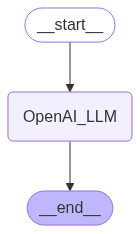

In [26]:
from IPython.display import Image, display

try:
    display(Image(workflow.get_graph().draw_mermaid_png()))
except Exception:
    # This requires some extra dependencies and is optional
    pass

In [ ]:
### Exceute the graph
input_state =  workflow.invoke({'question':"What are diffrences between Langchain and Langgraph?"})
input_state 

{'question': 'What are diffrences between Langchain and Langgraph?\n',
 'answer': 'Langchain and Langgraph are two different concepts in the field of artificial intelligence and machine learning.\n\n1. Langchain:\n- Langchain is a decentralized artificial intelligence platform that leverages blockchain technology to enable secure and transparent AI transactions.\n- It aims to create a marketplace where AI models, data, and services can be exchanged among users in a secure and trustless manner.\n- Langchain focuses on providing tools for building, training, and deploying machine learning models in a decentralized and collaborative environment.\n\n2. Langgraph:\n- Langgraph is a graph-based approach to natural language processing that represents language data as interconnected nodes and edges.\n- It focuses on capturing the semantic relationships between words and phrases in a text to enhance language understanding and processing.\n- Langgraph utilizes graph neural networks and other gra

In [29]:
input_state ['answer']

'Langchain and Langgraph are two different concepts in the field of artificial intelligence and machine learning.\n\n1. Langchain:\n- Langchain is a decentralized artificial intelligence platform that leverages blockchain technology to enable secure and transparent AI transactions.\n- It aims to create a marketplace where AI models, data, and services can be exchanged among users in a secure and trustless manner.\n- Langchain focuses on providing tools for building, training, and deploying machine learning models in a decentralized and collaborative environment.\n\n2. Langgraph:\n- Langgraph is a graph-based approach to natural language processing that represents language data as interconnected nodes and edges.\n- It focuses on capturing the semantic relationships between words and phrases in a text to enhance language understanding and processing.\n- Langgraph utilizes graph neural networks and other graph-based algorithms to analyze and extract meaning from textual data.\n\nIn summar

In [30]:
### Exceute the graph
input_state =  workflow.invoke({'question':"What are agents and how it is diffrent from Agentic AI?"})
input_state 

{'question': 'What are agents and how it is diffrent from Agentic AI?',
 'answer': 'Agents are autonomous entities that can perceive their environment, make decisions, and take actions to achieve their goals. They can be software programs, robots, humans, or other entities that are capable of acting independently.\n\nAgentic AI, on the other hand, refers to artificial intelligence systems that are designed to act autonomously and make decisions without human intervention. These systems are typically used in applications such as self-driving cars, industrial automation, and financial trading.\n\nThe main difference between agents and Agentic AI is that agents can be any autonomous entity capable of making decisions and taking actions, while Agentic AI specifically refers to artificial intelligence systems that operate autonomously.'}

In [31]:
input_state ['answer']

'Agents are autonomous entities that can perceive their environment, make decisions, and take actions to achieve their goals. They can be software programs, robots, humans, or other entities that are capable of acting independently.\n\nAgentic AI, on the other hand, refers to artificial intelligence systems that are designed to act autonomously and make decisions without human intervention. These systems are typically used in applications such as self-driving cars, industrial automation, and financial trading.\n\nThe main difference between agents and Agentic AI is that agents can be any autonomous entity capable of making decisions and taking actions, while Agentic AI specifically refers to artificial intelligence systems that operate autonomously.'

In [45]:
# Print the full conversation stream
print("Starting conversation...")
for event in workflow.stream({'question': "What are agents and how is it different from Agentic AI?"}):
    for key, value in event.items():
        if key == 'OpenAI_LLM':  # This is our node name
            print(f"\nQuestion: {value['question']}")
            print(f"Answer: {value['answer']}\n")


Starting conversation...

Question: What are agents and how is it different from Agentic AI?
Answer: Agents are individuals or entities that can act autonomously, making decisions and taking actions towards goals. They are capable of perceiving their environment, reasoning, and interacting with other agents and their surroundings.

Agentic AI, on the other hand, refers to artificial intelligence systems designed to act as agents. These systems are programmed to mimic human decision-making and problem-solving abilities, performing tasks that typically require human intelligence. While agents can be human or non-human entities, Agentic AI specifically refers to artificial agents.

